In [17]:
from importlib import reload

import dill
import matplotlib.pyplot as plt

import energy
import store
reload(store)

with open("data/8ef116/JobData.pkl", 'rb') as file:
    job_data = dill.load(file)


In [11]:
molecules = job_data.molecules
results = job_data.results

In [12]:
fci_energies = []
qsci_energies = []
for molecule, result in zip(molecules, results):
    fci, qsci = energy.calculate_energy_ladders(molecule, result)
    fci_energies.append(fci)
    qsci_energies.append(qsci)


Percentage of measurements in the correct particle sector:  12.927 %

Percentage of measurements in the correct particle sector:  12.744 %

Percentage of measurements in the correct particle sector:  20.581 %

Percentage of measurements in the correct particle sector:  12.268 %

Percentage of measurements in the correct particle sector:  13.208 %

Percentage of measurements in the correct particle sector:  22.449 %

Percentage of measurements in the correct particle sector:  20.337 %

Percentage of measurements in the correct particle sector:  21.375 %

Percentage of measurements in the correct particle sector:  19.104 %

Percentage of measurements in the correct particle sector:  10.583 %


In [18]:
data_path = store.job_data_path(job_data.job_id)

In [19]:
import numpy as np
qsci_stretch = np.array(list(zip(*qsci_energies)))
fci_stretch = np.array(list(zip(*fci_energies)))
qsci_error = qsci_stretch - fci_stretch

In [20]:
with open(data_path / "qsci_error.pkl", 'wb') as file:
    dill.dump(qsci_error, file)
with open(data_path / "qsci_energies.pkl", 'wb') as file:
    dill.dump(qsci_stretch, file)
with open(data_path / "fci_energies.pkl", 'wb') as file:
    dill.dump(fci_stretch, file)

In [1]:
import dill
with open("qsci_error.pkl", 'rb') as file:
    qsci_error = dill.load(file)

In [4]:
bond_lengths = []
for mol in job_data.molecules:
    bond_lengths.append((round(mol.geometry[1][1][2], 1)))

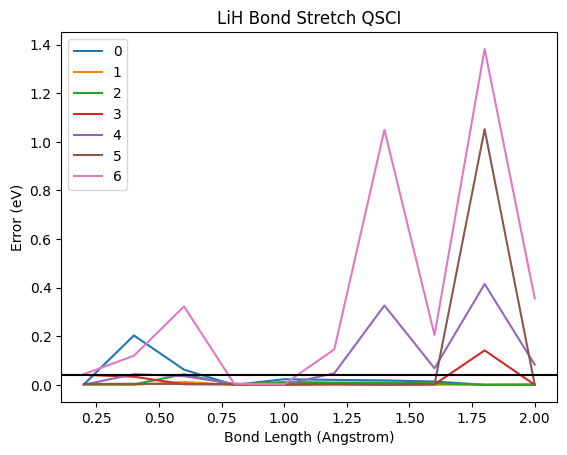

In [5]:
fig1 = plt.figure()
for i, state in enumerate(qsci_error):
    plt.plot(bond_lengths, state, label=str(i))
plt.axhline(0.043, color='black')
plt.legend()
plt.xlabel('Bond Length (Angstrom)')
plt.ylabel('Error (eV)')
plt.title('LiH Bond Stretch QSCI')
plt.show()

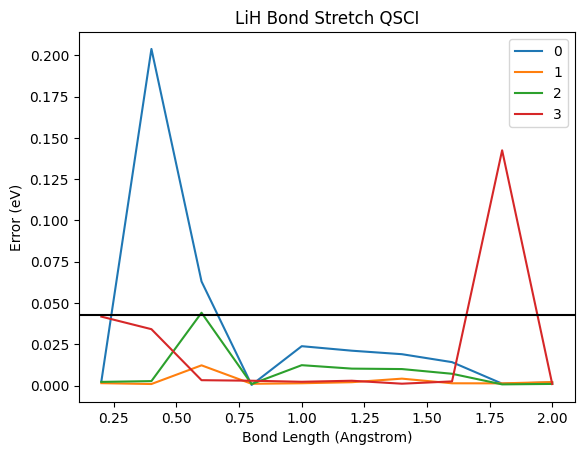

In [6]:
fig2 = plt.figure()
for i, state in enumerate(qsci_error[:-3]):
    plt.plot(bond_lengths, state, label=str(i))
plt.axhline(0.043, color='black')
plt.legend()
plt.xlabel('Bond Length (Angstrom)')
plt.ylabel('Error (eV)')
plt.title('LiH Bond Stretch QSCI')
plt.show()

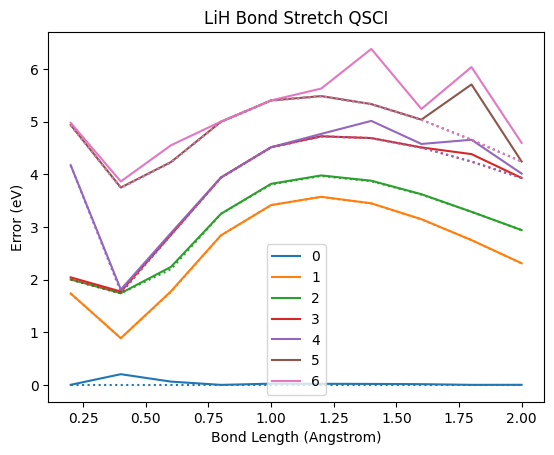

In [25]:
fig3 = plt.figure()
for i, state in enumerate(qsci_stretch):
    plt.plot(bond_lengths, state, label=str(i))
plt.legend()

# Reset colour cycle so FCI and QSCI colours correspond
plt.gca().set_prop_cycle(None)
for i, state in enumerate(fci_stretch):
    plt.plot(bond_lengths, state, ':', label=str(i))

plt.xlabel('Bond Length (Angstrom)')
plt.ylabel('Error (eV)')
plt.title('LiH Bond Stretch QSCI')
plt.show()